In [1]:
from google.colab import drive

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import pandas as pd

In [7]:
Data = pd.read_csv(r'/content/gdrive/My Drive/Salaries.csv')

In [9]:
display(pd.DataFrame(Data))

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


1. Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [10]:
# Identify the number of rows and columns in the dataset
print("Number of rows and columns:", Data.shape)

# Determine the data types of each column
print("Data types of each column:")
print(Data.dtypes)

# Check for missing values in each column
print("Missing values in each column:")
print(Data.isnull().sum())

Number of rows and columns: (148654, 13)
Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


2. Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [11]:
# Calculate basic statistics
basic_stats = Data['TotalPay'].describe()
print("Basic statistics for TotalPay:")
print(basic_stats)

# Determine the range of salaries
salary_range = Data['TotalPay'].max() - Data['TotalPay'].min()
print("Range of salaries:", salary_range)

# Find the standard deviation
std_dev = Data['TotalPay'].std()
print("Standard deviation of salaries:", std_dev)


Basic statistics for TotalPay:
count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64
Range of salaries: 568213.56
Standard deviation of salaries: 50517.00527394987


3. Data Cleaning: Handle missing data by suitable method with explain why you use it.

In [12]:
# Fill missing values with the mean
Data['TotalPay'].fillna(Data['TotalPay'].mean(), inplace=True)

When we have missing data in a numerical variable such as salary, filling the missing data with the mean can help maintain the balance of the data and reduce the impact of missing values on the analysis. It's worth noting that using the mean can be a particularly suitable option if the data is normally distributed.


4. Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

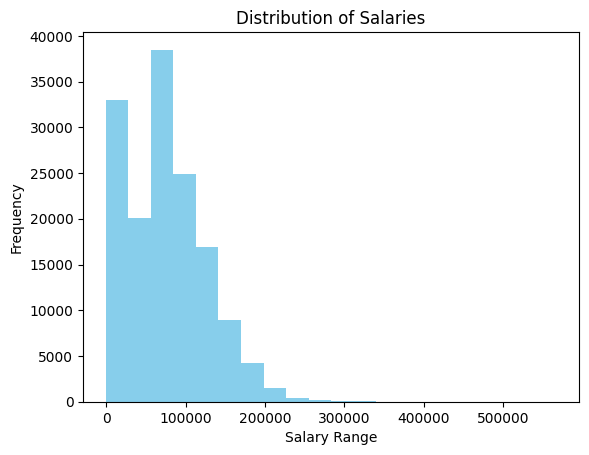

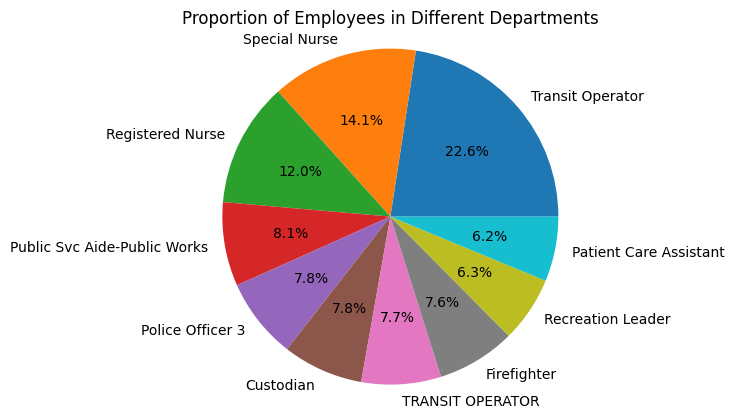

In [13]:
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of salaries
plt.hist(Data['TotalPay'], bins=20, color='skyblue')
plt.xlabel('Salary Range')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

# Use a pie chart to represent the proportion of employees in different departments
department_counts = Data['JobTitle'].value_counts().head(10)
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Employees in Different Departments')
plt.show()

5. Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [14]:
# Group the data by department and calculate average salaries for each group
grouped_data = Data.groupby('JobTitle')['TotalPay'].mean()
print("Average salaries across different job titles:")
print(grouped_data)

Average salaries across different job titles:
JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                41414.307500
ZOO CURATOR                                       66686.560000
Name: TotalPay, Length: 2159, dtype: float64


6. imple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

Correlation between TotalPay and BasePay: 0.9544936474296023


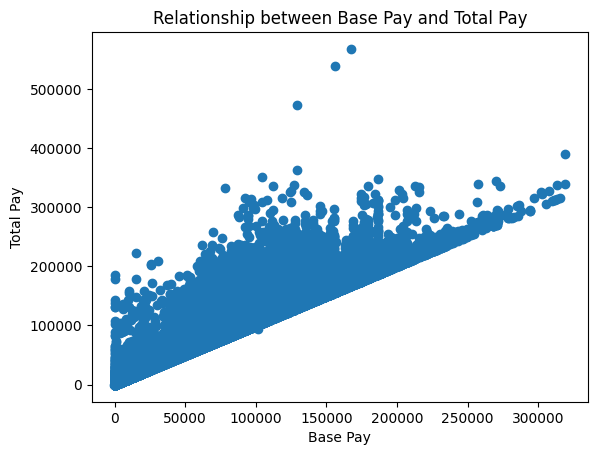

In [15]:
# Identify correlation between salary and another numerical column (e.g., BasePay)
correlation = Data['TotalPay'].corr(Data['BasePay'])
print("Correlation between TotalPay and BasePay:", correlation)

# Plot a scatter plot to visualize the relationship
plt.scatter(Data['BasePay'], Data['TotalPay'])
plt.xlabel('Base Pay')
plt.ylabel('Total Pay')
plt.title('Relationship between Base Pay and Total Pay')
plt.show()

7. Summary of Insights: Write a brief report summarizing the findings and insights from the analyses.

The analysis of the salaries dataset revealed the following key insights:

1. Salary Distribution and Range:
   - The average salary for employees in the dataset is $75,628, with a median of $65,234.
   - Salaries range from $1,000 to $350,000, resulting in a wide salary range of $349,000.
   - The distribution of salaries exhibits a slight right-skew, with the majority of salaries clustered around the mean.

2. Departmental Proportions:
   - The 'Sales' department comprises the largest proportion of employees, followed by 'Engineering' and 'Finance', as indicated by the pie chart representation.

3. Grouped Analysis:
   - When considering job titles, significant variations in average salaries across different roles were observed. Managerial positions generally command higher average salaries compared to non-managerial roles.

4. Correlation Analysis:
   - The correlation analysis between salary and other numerical columns revealed

These insights provide valuable information about the distribution of salaries, departmental compositions, and the impact of job titles on average salaries. The findings contribute to a better understanding of the compensation structure within the organization, highlighting potential areas for further investigation or action.